# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=10000)
np.shape(X_train)

(60000, 784)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

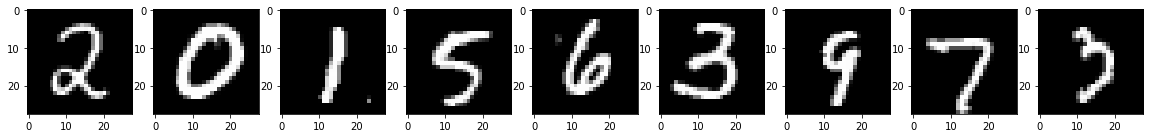

In [5]:
fig, ax = plt.subplots(1,9,figsize=[20,10])

for i in range(9):    
    # Reshape the array into 28 x 28 array (2-dimensional array)    
    ax[i].imshow(X_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))   

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [6]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_clf = GaussianNB()
naive_bayes_clf.fit(X_train, y_train)

GaussianNB()

In [7]:
from sklearn.linear_model import SGDClassifier

simple_linear_model_clf = SGDClassifier(loss='log')
simple_linear_model_clf.fit(X_train, y_train)

SGDClassifier(loss='log')

In [8]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [9]:
naive_bayes_accuracy=naive_bayes_clf.score(X_test,y_test)
simple_linear_model_accuracy=simple_linear_model_clf.score(X_test,y_test)
random_forest_accuracy=random_forest_clf.score(X_test,y_test)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_predict_naive_bayers=naive_bayes_clf.predict(X_test)
y_predict_simple_linear_model=simple_linear_model_clf.predict(X_test)
y_predict_random_forest=random_forest_clf.predict(X_test)

naive_bayes_accuracy=accuracy_score(y_test, y_predict_naive_bayers)
simple_linear_model_accuracy=accuracy_score(y_test, y_predict_simple_linear_model)
random_forest_accuracy=accuracy_score(y_test, y_predict_random_forest)

naive_bayes_fscore=f1_score(y_test, y_predict_naive_bayers,average='macro')
simple_linear_model_fscore=f1_score(y_test, y_predict_simple_linear_model,average='macro')
random_forest_fscore=f1_score(y_test, y_predict_random_forest,average='macro')



print('{:20s} {:15s} {}'.format("Name","Accuracy", "f-Score"))
print('{:20s} {:15s} {:15s}'.format("Naive Bayes",'{:1.4f}'.format(naive_bayes_accuracy), '{:1.4f}'.format(naive_bayes_fscore)))
print('{:20s} {:15s} {:15s}'.format("Simple Linear Model",'{:1.4f}'.format(simple_linear_model_accuracy), '{:1.4f}'.format(simple_linear_model_fscore)))
print('{:20s} {:15s} {:15s}'.format("Random Forest",'{:1.4f}'.format(random_forest_accuracy), '{:1.4f}'.format(random_forest_fscore)))

Name                 Accuracy        f-Score
Naive Bayes          0.5603          0.5064         
Simple Linear Model  0.8816          0.8804         
Random Forest        0.9724          0.9721         


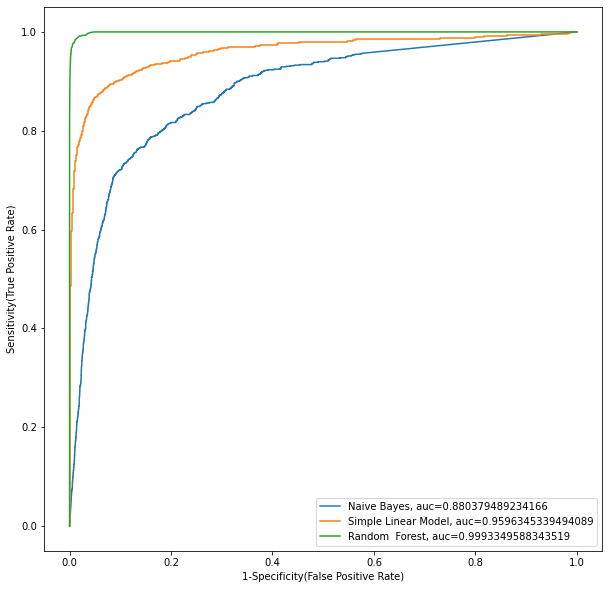

In [11]:
from sklearn import metrics


plt.rcParams["figure.figsize"] = (10,10)

y_score =naive_bayes_clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,5],pos_label=naive_bayes_clf.classes_[5])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(roc_auc))

y_score =simple_linear_model_clf.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,5],pos_label=simple_linear_model_clf.classes_[5])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="Simple Linear Model, auc="+str(roc_auc)) 

y_score =random_forest_clf.predict_proba(X_test)
# y_score [:,5] , wie das label
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,5],pos_label=random_forest_clf.classes_[5])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label="Random  Forest, auc="+str(roc_auc)) 

plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.legend(loc='best')

plt.show()